In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

# Creating the dataset
data = pd.read_csv("C:\\data\\dataset.csv")
data

,User ID,Gender,Age,Activity Level,Location,App Sessions,Distance Travelled (km),Calories Burned
0,1,Female,22,Active,Suburban,151,140,728
1,2,Male,50,Active,Rural,157,115,523
2,3,Male,36,Active,Urban,178,163,795
3,4,Female,36,Active,Suburban,155,85,715
4,5,Male,34,Sedentary,Rural,95,71,439
...,...,...,...,...,...,...,...,...
4995,4996,Female,50,Active,Urban,155,151,502
4996,4997,Female,37,Moderate,Rural,127,84,586
4997,4998,Female,47,Moderate,Suburban,140,116,649
4998,4999,Female,59,Sedentary,Suburban,85,63,301


In [2]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])      # Male=1, Female=0
data['Activity Level'] = encoder.fit_transform(data['Activity Level'])  # Active=0, Moderate=2, Sedentary=1
data['Location'] = encoder.fit_transform(data['Location'])  # Urban=2, Rural=1, Suburban=0

# Drop unused columns
if 'User ID' in data.columns:
    data = data.drop(columns=['User ID'])
else:
    print("Warning: 'User ID' column not found. Skipping drop operation.")
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Display the preprocessed dataset
print("\nPreprocessed Data:\n", data)

Missing values:
 Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64

Preprocessed Data:
       Gender  Age  Activity Level  Location  App Sessions  \
0          0   22               0         1           151   
1          1   50               0         0           157   
2          1   36               0         2           178   
3          0   36               0         1           155   
4          1   34               2         0            95   
...      ...  ...             ...       ...           ...   
4995       0   50               0         2           155   
4996       0   37               1         0           127   
4997       0   47               1         1           140   
4998       0   59               2         1            85   
4999       0   43               1         2           143   

      Distanc

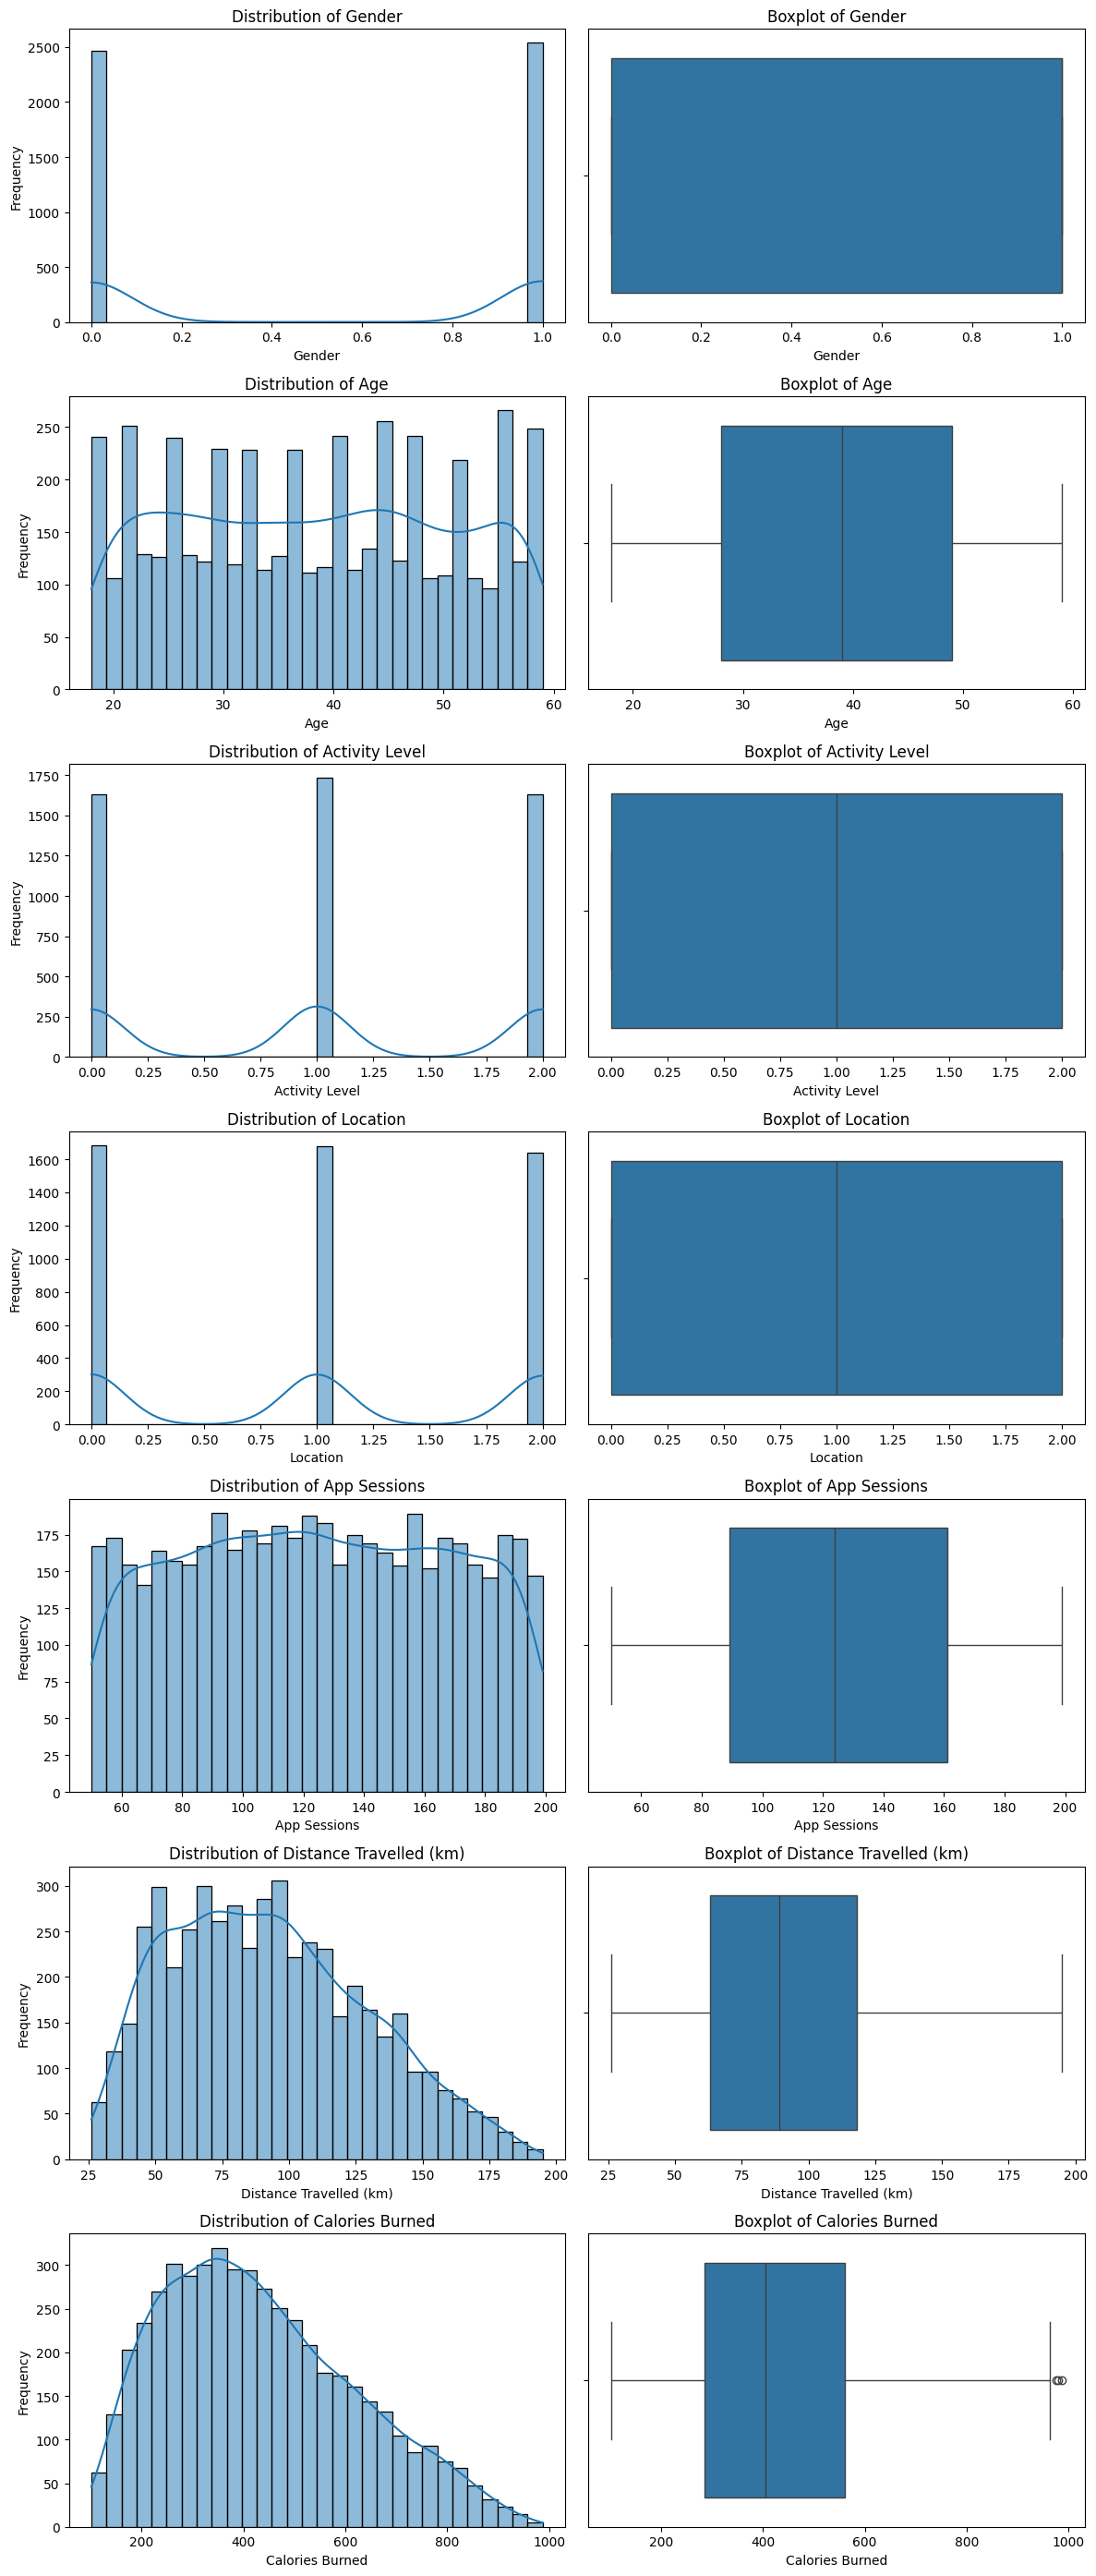

In [3]:
# # Check for missing values
# missing_values = data.isnull().sum()
# print("Missing values:\n", missing_values)

# Select numerical features for visualization
numerical_features = data.select_dtypes(include=[np.number]).columns

# Plot distributions using histograms
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features) * 4))

for i, column in enumerate(numerical_features):
    sns.histplot(data[column], kde=True, bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    sns.boxplot(x=data[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [4]:
import pandas as pd

# Display summary statistics
print("Summary Statistics:\n", data.describe())

Summary Statistics:
             Gender          Age  Activity Level     Location  App Sessions  \
count  5000.000000  5000.000000     5000.000000  5000.000000   5000.000000   
mean      0.507600    38.423600        1.000400     0.990800    124.366400   
std       0.499992    12.160631        0.808289     0.815137     42.689317   
min       0.000000    18.000000        0.000000     0.000000     50.000000   
25%       0.000000    28.000000        0.000000     0.000000     89.000000   
50%       1.000000    39.000000        1.000000     1.000000    124.000000   
75%       1.000000    49.000000        2.000000     2.000000    161.000000   
max       1.000000    59.000000        2.000000     2.000000    199.000000   

       Distance Travelled (km)  Calories Burned  
count              5000.000000      5000.000000  
mean                 92.550400       432.316000  
std                  36.746095       187.427426  
min                  26.000000       102.000000  
25%                  63.00

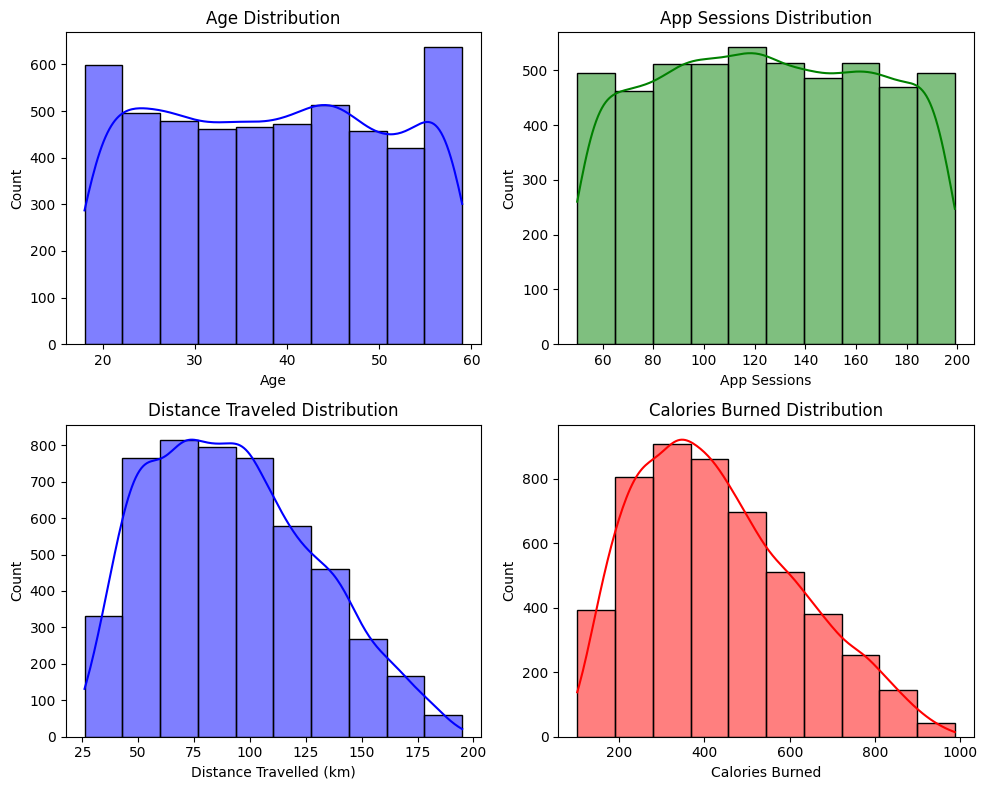

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of numerical features
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data['Age'], bins=10, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Age Distribution')

sns.histplot(data['App Sessions'], bins=10, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('App Sessions Distribution')

sns.histplot(data['Distance Travelled (km)'], bins=10, kde=True, ax=axes[1, 0], color='blue')
axes[1, 0].set_title('Distance Traveled Distribution')

sns.histplot(data['Calories Burned'], bins=10, kde=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Calories Burned Distribution')

plt.tight_layout()
plt.show()

Correlation Matrix:
                            Gender       Age  Activity Level  Location  \
Gender                   1.000000  0.002267        0.003952 -0.022406   
Age                      0.002267  1.000000        0.007431 -0.012159   
Activity Level           0.003952  0.007431        1.000000 -0.009710   
Location                -0.022406 -0.012159       -0.009710  1.000000   
App Sessions            -0.005829 -0.001718       -0.940958  0.013963   
Distance Travelled (km)  0.001122 -0.003733       -0.806884  0.014140   
Calories Burned         -0.009394 -0.003620       -0.748008 -0.002614   

                         App Sessions  Distance Travelled (km)  \
Gender                      -0.005829                 0.001122   
Age                         -0.001718                -0.003733   
Activity Level              -0.940958                -0.806884   
Location                     0.013963                 0.014140   
App Sessions                 1.000000                 0.857045  

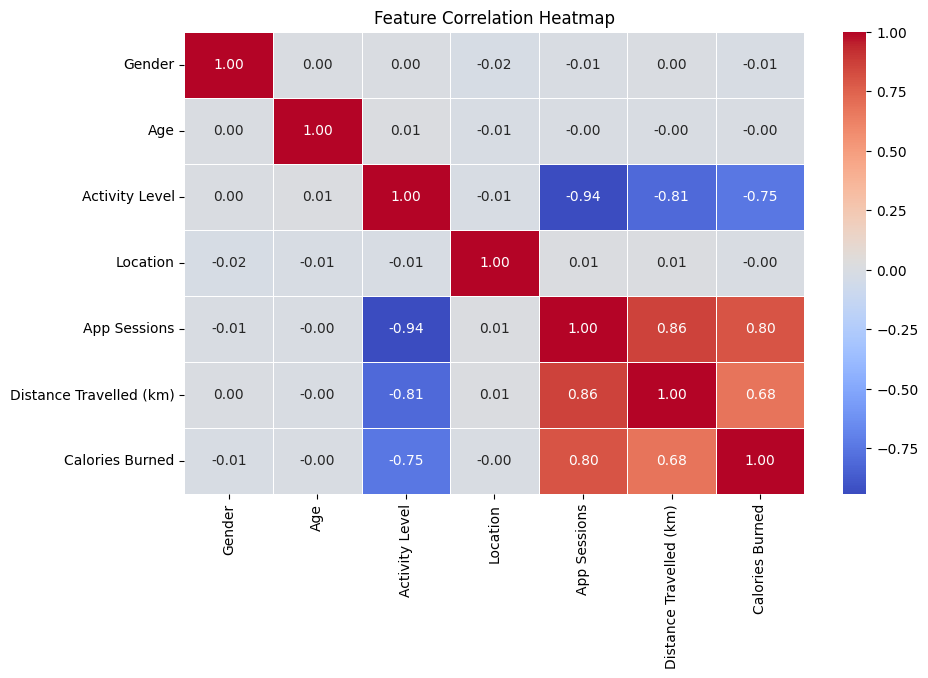

In [6]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12988\753458548.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Activity Level'], y=df['App Sessions'], palette="coolwarm")


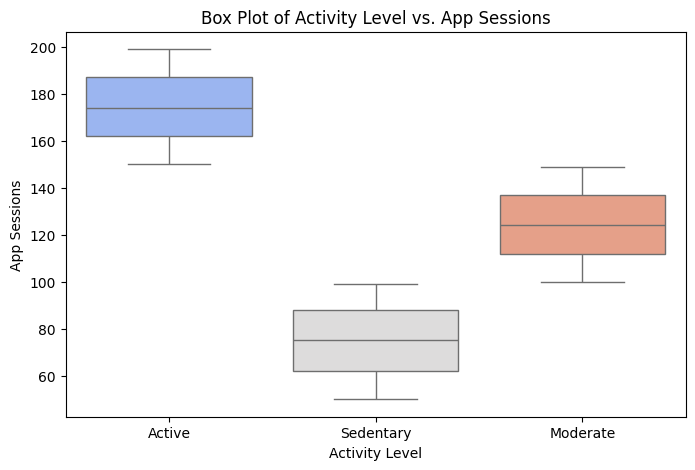

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/mnt/data/dataset for assignment 2 1.csv"  # Update if needed
df = pd.read_csv("C:\\data\\dataset.csv")
data
# Box Plot: Activity Level vs. App Sessions
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Activity Level'], y=df['App Sessions'], palette="coolwarm")

# Labels and Title
plt.xlabel("Activity Level")
plt.ylabel("App Sessions")
plt.title("Box Plot of Activity Level vs. App Sessions")

# Show Plot
plt.show()


MAE: 14.60408212998122
MSE: 331.92825117843205
R² Score: 0.8216633903895458


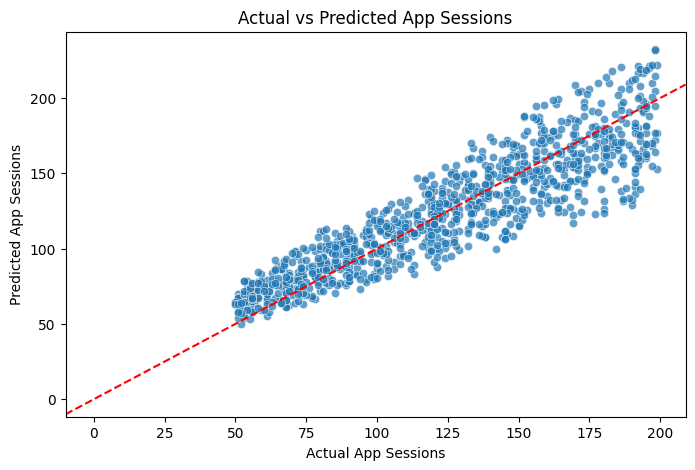

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12988\1796615638.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.index, y=coefficients["Coefficient"], palette="coolwarm")


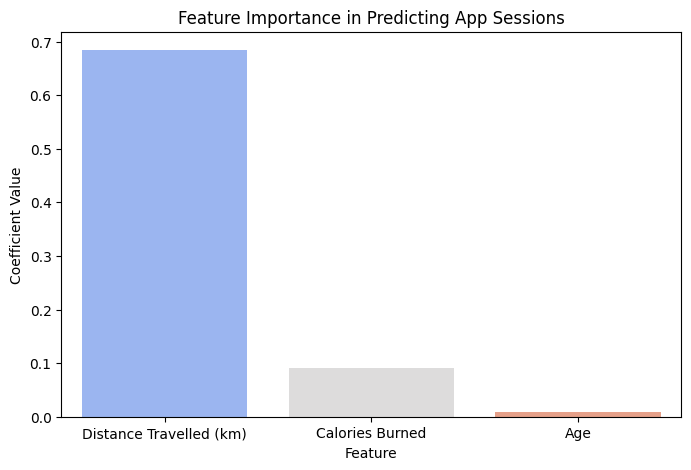

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/mnt/data/dataset for assignment 2 1.csv"  # Update if needed
df = pd.read_csv("C:\\data\\dataset.csv")
data

# Select features and target variable
X = df[['Age', 'Distance Travelled (km)', 'Calories Burned']]
y = df['App Sessions']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

# 1️⃣ Scatter Plot: Actual vs Predicted Values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual App Sessions")
plt.ylabel("Predicted App Sessions")
plt.title("Actual vs Predicted App Sessions")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Perfect prediction line
plt.show()

# 2️⃣ Feature Importance Visualization (Regression Coefficients)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coefficients.sort_values(by="Coefficient", ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients.index, y=coefficients["Coefficient"], palette="coolwarm")
plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.title("Feature Importance in Predicting App Sessions")
plt.show()


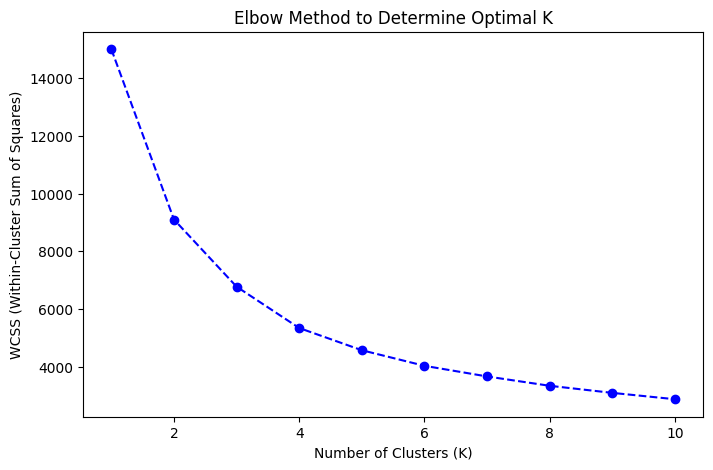

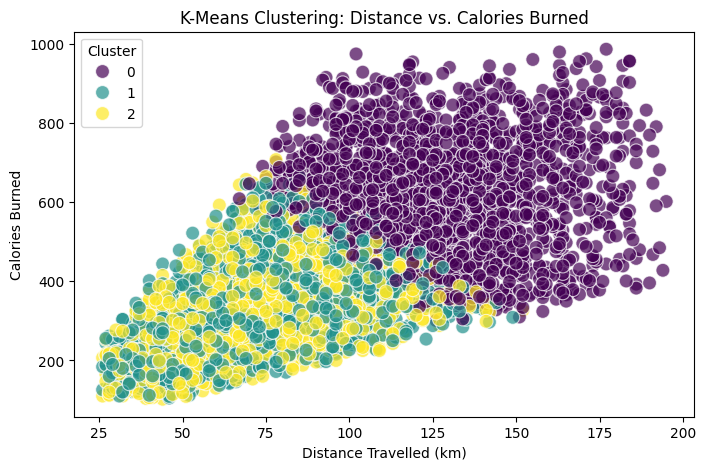

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "/mnt/data/dataset for assignment 2 1.csv"  # Update if needed
df = pd.read_csv("C:\\data\\dataset.csv")

# Selecting features for clustering
X = df[['Age', 'Distance Travelled (km)', 'Calories Burned']]

# Standardize the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Determine optimal clusters using the Elbow Method
wcss = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares

# 📊 Plot Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

# 🔹 Apply K-Means with optimal K (choose based on Elbow Graph)
optimal_k = 3  # Adjust this based on the elbow point
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 📊 Scatter Plot for Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Distance Travelled (km)'], y=df['Calories Burned'], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.xlabel("Distance Travelled (km)")
plt.ylabel("Calories Burned")
plt.title("K-Means Clustering: Distance vs. Calories Burned")
plt.legend(title="Cluster")
plt.show()


Accuracy: 0.518
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.53      0.51       468
           1       0.55      0.50      0.53       532

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000

Confusion Matrix:
 [[250 218]
 [264 268]]
Feature Importances: [0.23284542 0.37916598 0.3879886  0.        ]


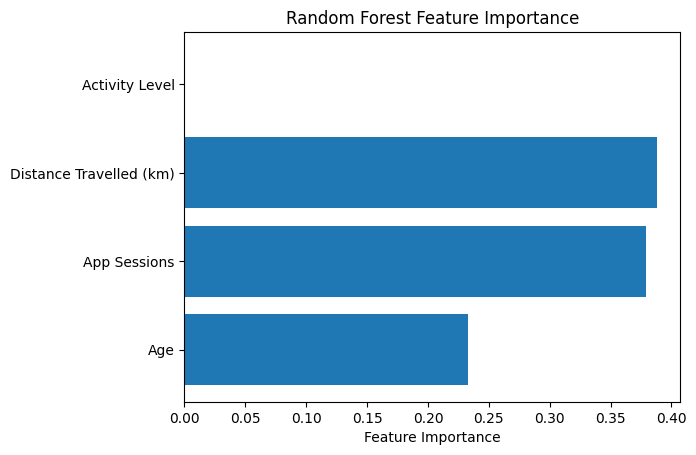

In [16]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode categorical variables into numerical values
data['Activity Level'] = label_encoder.fit_transform(data['Activity Level'])  # Encoding 'Activity Level'
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Encoding 'Gender' (if needed)

# Ensure all columns used in X are numeric
# Feature selection (choose features and target variable for classification)
X = data[['Age', 'App Sessions', 'Distance Travelled (km)', 'Activity Level']]  # Independent variables
Y = data['Gender']  # Target variable (for example, predicting 'Gender')

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

# Feature importance (optional)
importances = rf_classifier.feature_importances_
print(f"Feature Importances: {importances}")

# Plotting feature importance
import matplotlib.pyplot as plt
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

Mean Absolute Error (MAE): 13.620322333333334
Mean Squared Error (MSE): 309.73590900228686
R² Score: 0.833586771568936


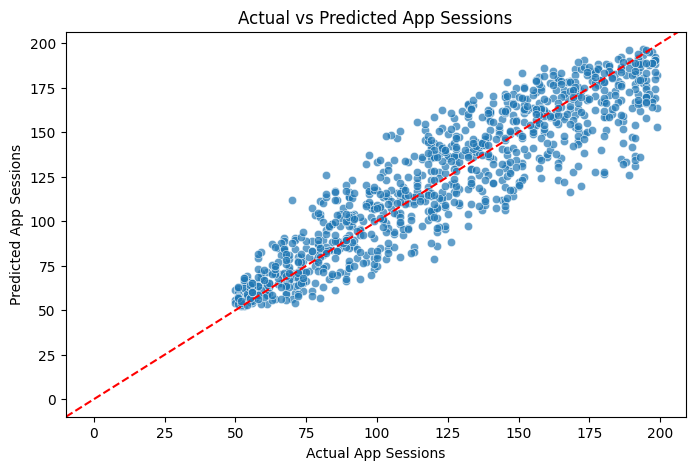

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12988\1527133855.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.index, y=feature_importances["Importance"], palette="coolwarm")


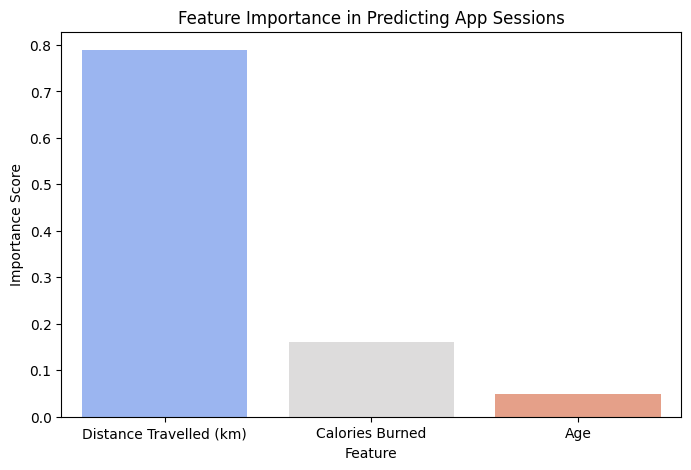

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/mnt/data/dataset for assignment 2 1.csv"  # Update if needed
df = pd.read_csv("C:\\data\\dataset.csv")

# Select features and target variable
X = df[['Age', 'Distance Travelled (km)', 'Calories Burned']]
y = df['App Sessions']

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# 📊 Scatter Plot: Actual vs Predicted Values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual App Sessions")
plt.ylabel("Predicted App Sessions")
plt.title("Actual vs Predicted App Sessions")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Perfect prediction line
plt.show()

# 📊 Feature Importance Visualization
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
feature_importances.sort_values(by="Importance", ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances.index, y=feature_importances["Importance"], palette="coolwarm")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance in Predicting App Sessions")
plt.show()



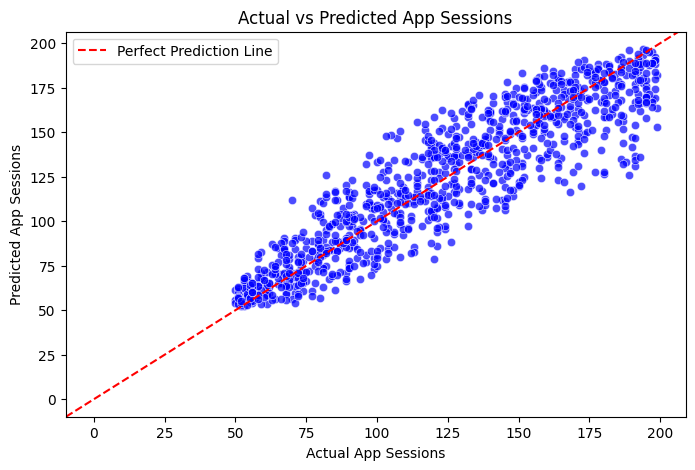

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Scatter Plot: Actual vs Predicted Values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual App Sessions")
plt.ylabel("Predicted App Sessions")
plt.title("Actual vs Predicted App Sessions")
plt.axline([0, 0], [1, 1], color="red", linestyle="--", label="Perfect Prediction Line")  
plt.legend()
plt.show()


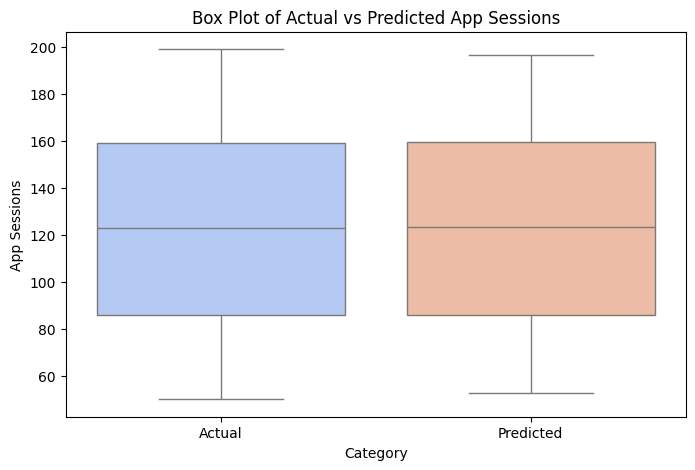

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for visualization
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# 📊 Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=results_df, palette="coolwarm")

# Labels and Title
plt.xlabel("Category")
plt.ylabel("App Sessions")
plt.title("Box Plot of Actual vs Predicted App Sessions")

# Show Plot
plt.show()
